## Mining exonic embedded microRNAs across different species 

### This script is written by ***Tyron Chang*** , the programming languages and tools used for this study are are shown below:

##### 1. Python (data cleaning and processing)

##### 2. BEDTools (overlapping the exonic microRNAs)

##### 3. Shell (use awk and basic command lines to convert tsv files into bed file)




The general method for this python script is shown below:

* #### Load dataset

* #### Data frame reprocessing ===> Creates two dataframes and concatenate them together

* #### Using Pandas to split and explode the dataframe.

* #### Remove all microRNAs in the finalized dataframe. To separate miRNAs genes from the dataset, you will need to use regular expression.

* #### To figure out which bash scripts to run together with this python script please follow the steps from this document.

* #### The order of the bash script goes like this:
  1) bedtools_species_exonic_miR.sh
  2) bedtools_species_nonexonic_miR.sh
  3) bedtools_species_intronic_miR.sh 
 

### Data Scraping

#### Instruction

The Data can be obtained from [this link ](https://genome.ucsc.edu/cgi-bin/hgTables), which will take you to UCSC table genome browser. 
This csv file will give you all genes and their associated cooridnates.

You will see:

![Home Page](./homepage.png)


To find the microRNA genes and their corresponding coordinates, please go to miRBase. Here is [this link ](https://www.mirbase.org/download/)

*hsa.gff3 is for human*

![miRBase Page](./miRbase_data.png)


### Now once you have downloaded the data, please import necessary libraries

In [1]:
import pandas as pd

In [2]:
import re ### for data filtering using regex

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os

### Using OOP to refactor code for miR analysis.

In [5]:
#The data (csv file) is obtained from UCSC table genome browser:
#Go to table browser in UCSC genome website.
#The website is https://genome.ucsc.edu/cgi-bin/hgTables----> this is human one. You can also choose different species.


In [6]:
current_dir=os.getcwd() # import current directory

### 1. Human data ( 1st step of data cleaning: reshape column)

In [7]:
import import_ipynb
from Data import HUMAN

importing Jupyter notebook from Data.ipynb


In [8]:
human=HUMAN(f'{current_dir}/UCSC_data_Human/human_genes_010324_NCBI.csv')#human gene coordinates tables

In [9]:
"""This function reorganize and clean the columns by doing the following:"""
human.col_preprocess()
# human.df.columns=gene.df.columns.str.replace("#","") 
### Get rid of "#" symbols in the column names.
# gene.df.columns=gene.df.columns.str.replace('"',"")
### Remove '' in the column names.

In [10]:
human.drop()### drop 'bin' column

In [11]:
human.df.rename(columns={'name2':'gene_name'},inplace=True)
### Replace the column name

In [12]:
# Function to calculate mRNA length
def calculate_mrna_length(row):
    starts = list(map(int, row['exonStarts'].split(',')[:-1]))
    ends = list(map(int, row['exonEnds'].split(',')[:-1]))
    lengths = [end - start for start, end in zip(starts, ends)]
    return sum(lengths)

# Apply the function to each row and create a new column for mRNA length
human.df['mature_mRNA_Length'] = human.df.apply(calculate_mrna_length, axis=1)


In [13]:
human_gene_df=human.select(['chrom','exonStarts','exonCount',
                        'gene_name','name'])
### Create a new data frame by selecting certain columns from the original dataframe.

In [14]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.replace(r',\Z','',regex=True)
### remove the comma by the end of the column prior to splitting the data. \Z means the end of the line.

In [15]:
human_gene_df['exonStarts']=human_gene_df['exonStarts'].str.split(",")

In [16]:
human_gene_df=human_gene_df.explode('exonStarts')

In [17]:
human_gene_df=human_gene_df.reset_index(drop=True)

In [18]:
human.df

,name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,score,gene_name,cdsStartStat,cdsEndStat,exonFrames,mature_mRNA_Length
0,XM_011541469.2,chr1,-,67092164,67109072,67093004,67103382,5,"67092164,67095234,67096251,67103237,67109028,","67093604,67095421,67096321,67103382,67109072,",0,C1orf141,cmpl,cmpl,"0,2,1,0,-1,",1886
1,XM_017001276.2,chr1,-,67092164,67131227,67093004,67127240,9,"67092164,67095234,67096251,67103237,67111576,6...","67093604,67095421,67096321,67103382,67111644,6...",0,C1orf141,cmpl,cmpl,"0,2,1,0,1,2,0,0,-1,",2359
2,XM_011541467.2,chr1,-,67092164,67131227,67093004,67127240,9,"67092164,67095234,67096251,67103237,67111576,6...","67093604,67095421,67096321,67103343,67111644,6...",0,C1orf141,cmpl,cmpl,"0,2,1,0,1,2,0,0,-1,",2320
3,NM_001276352.2,chr1,-,67092164,67134970,67093579,67127240,9,"67092164,67096251,67103237,67111576,67115351,6...","67093604,67096321,67103382,67111644,67115464,6...",0,C1orf141,cmpl,cmpl,"2,1,0,1,2,0,0,-1,-1,",2213
4,NM_001276351.2,chr1,-,67092164,67134970,67093004,67127240,8,"67092164,67095234,67096251,67115351,67125751,6...","67093604,67095421,67096321,67115464,67125909,6...",0,C1orf141,cmpl,cmpl,"0,2,1,2,0,0,-1,-1,",2187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196092,NR_146119.1,chr22_KI270733v1_random,+,125930,127799,127799,127799,1,"125930,","127799,",0,RNA18SN4,none,none,"-1,",1869
196093,NR_146120.1,chr22_KI270733v1_random,+,128876,129032,129032,129032,1,"128876,","129032,",0,RNA5-8SN4,none,none,"-1,",156
196094,XR_951367.3,chr22_KI270733v1_random,+,137952,140657,140657,140657,3,"137952,139917,140141,","139524,140014,140657,",0,LOC105379549,none,none,"-1,-1,-1,",2185
196095,XR_001756152.2,chr22_KI270733v1_random,+,140978,143466,143466,143466,3,"140978,141290,143090,","141129,141382,143466,",0,LOC107987393,none,none,"-1,-1,-1,",619


In [19]:
human_gene_df_2=human.select(['exonEnds','cdsStart','cdsEnd','strand','exonCount','txStart','txEnd','mature_mRNA_Length','gene_name','name'])

In [20]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.replace(r',\Z','',regex=True)
### remove the comma at the end of column

In [21]:
human_gene_df_2['exonEnds']=human_gene_df_2['exonEnds'].str.split(",")

In [22]:
human_gene_df_2=human_gene_df_2.explode('exonEnds')

In [23]:
human_gene_df_2.head(50).reset_index(drop=True)

,exonEnds,cdsStart,cdsEnd,strand,exonCount,txStart,txEnd,mature_mRNA_Length,gene_name,name
0,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
5,67093604,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
6,67095421,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
7,67096321,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
8,67103382,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2
9,67111644,67093004,67127240,-,9,67092164,67131227,2359,C1orf141,XM_017001276.2


In [24]:
human_gene_df_2.rename(columns={'gene_name':'Name','exonCount':'exon_count','name':'ID'},inplace=True)

In [25]:
human_gene_df_2 = human_gene_df_2.reset_index(drop=True)

### 2. Concatanate the dataframe (Reshape the dataframe) and remove all miRNA dataset (2nd step)

### Human

In [26]:
finalized_human_gene_df=pd.concat([human_gene_df,human_gene_df_2], axis=1)#### This file contains all human genes!

In [27]:
finalized_human_gene_df.shape

(2292643, 15)

In [28]:
finalized_human_gene_df

,chrom,exonStarts,exonCount,gene_name,name,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
0,chr1,67092164,5,C1orf141,XM_011541469.2,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,chr1,67095234,5,C1orf141,XM_011541469.2,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,chr1,67096251,5,C1orf141,XM_011541469.2,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,chr1,67103237,5,C1orf141,XM_011541469.2,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,chr1,67109028,5,C1orf141,XM_011541469.2,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2292638,chr22_KI270733v1_random,140978,3,LOC107987393,XR_001756152.2,141129,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292639,chr22_KI270733v1_random,141290,3,LOC107987393,XR_001756152.2,141382,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292640,chr22_KI270733v1_random,143090,3,LOC107987393,XR_001756152.2,143466,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292641,chr22_KI270733v1_random,171576,2,LOC124905331,XM_047442803.1,173652,172877,174046,-,2,171576,174046,2087,LOC124905331,XM_047442803.1


In [29]:
finalized_human_gene_df.drop(columns=['exonCount','gene_name','name'],inplace=True)

In [30]:
finalized_human_gene_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [31]:
finalized_human_gene_df

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
0,chr1,67092164,67093604,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
1,chr1,67095234,67095421,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
2,chr1,67096251,67096321,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
3,chr1,67103237,67103382,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
4,chr1,67109028,67109072,67093004,67103382,-,5,67092164,67109072,1886,C1orf141,XM_011541469.2
...,...,...,...,...,...,...,...,...,...,...,...,...
2292638,chr22_KI270733v1_random,140978,141129,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292639,chr22_KI270733v1_random,141290,141382,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292640,chr22_KI270733v1_random,143090,143466,143466,143466,+,3,140978,143466,619,LOC107987393,XR_001756152.2
2292641,chr22_KI270733v1_random,171576,173652,172877,174046,-,2,171576,174046,2087,LOC124905331,XM_047442803.1


In [32]:
####This regex only extracts microRNA but not lncRNA.
p=r'^MIR\d+(-\d+)*$|^MIR\d+[A-Z]([A-Z]|\d)*$(?<!HG)$|^hsa-mir|^MIRLET\d[A-Z]\d*$(?<!HG)$'

In [33]:
human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(
p, flags=re.I,regex=True)]####Remove all miR from the data. So this file has all human genes except for miRNAs

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/633104615.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_all_genes_no_miR_df=finalized_human_gene_df.loc[~finalized_human_gene_df['Name'].str.contains(


In [34]:
human_all_genes_no_miR_df.shape

(2290504, 12)

In [35]:
human_all_genes_no_miR_df.columns

Index(['chrom', 'exonStarts', 'exonEnds', 'cdsStart', 'cdsEnd', 'strand',
       'exon_count', 'txStart', 'txEnd', 'mature_mRNA_Length', 'Name', 'ID'],
      dtype='object')

In [36]:
### save the file
human_all_genes_no_miR_df.to_csv(f'{current_dir}/Human_bash_script/human_all_genes_no_miR_df_NCBI.tsv',sep='\t',index=False)

### 3. Extract miR data (3rd step)

#### human

In [36]:
human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/1690666355.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_df_miR=finalized_human_gene_df.loc[finalized_human_gene_df['Name'].str.contains(p,flags=re.I,regex=True)]


In [37]:
human_df_miR.shape ### this dataset do not have lncRNA (e.g. miR-210HG) It has only miRNAs

(2139, 12)

In [38]:
human_df_miR.head(5)

,chrom,exonStarts,exonEnds,cdsStart,cdsEnd,strand,exon_count,txStart,txEnd,mature_mRNA_Length,Name,ID
111924,chr1,17368,17436,17436,17436,-,1,17368,17436,68,MIR6859-1,NR_106918.1
111928,chr1,30365,30503,30503,30503,+,1,30365,30503,138,MIR1302-2,NR_036051.1
112070,chr1,187890,187958,187958,187958,-,1,187890,187958,68,MIR6859-2,NR_107062.1
112109,chr1,632614,632685,632685,632685,-,1,632614,632685,71,MIR12136,NR_162149.1
112540,chr1,1167103,1167198,1167198,1167198,+,1,1167103,1167198,95,MIR200B,NR_029639.1


In [39]:
###save the file for microRNA dataset
human_df_miR.to_csv(f'{current_dir}/Human_bash_script/df_humanmiR_NCBI.tsv',sep="\t",index=False)

### After this step, you first will use Bedtools to find all exonic.

### For running the Bedtools script,
* #### We will use GFF file retrieved from miRBase(hsa.gff)
* #### hsa.gff3 file will be converted into tsv file first(hsa.tsv)using BASH

#### Remember bedtools_human_exonic_miR.sh script will generate a tsv file that have all human exonic microRNAs 

(e.g.human_exonic_miR_NCBI.tsv)

### 5. Hence this step is to organize your exonic microRNA files
* we only want to have the primary miRNA name and their host genes
(Run this section of code after running bedtools_human_exonic_miR.sh)

## Organize the output file(exonic miRs)
* Asssign gene types (noncoding vs protein-coding genes).
* Map the regions of exonic micrornas (5'UTR, 3'UTR, CDS).
* Map all the locations of miRs (exonic, intronic, no host mRNA, span intron-exon.)

In [39]:
#bedtools will generate the overlapped exonic miR files


columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_exonCounts','hostgene_txStarts','hostgene_txEnds','mature_host_mRNA_Length',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [40]:
# Organize and finalize the exonic microRNA files from the bedtools result

human_exonicmiR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_exonic_miR_NCBI.tsv', sep='\t', header=None, names=columns)

In [41]:
human_exonicmiR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
1,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
2,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
3,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
4,chr1,175953957,175972080,175971939,176175951,-,17,175953957,176184692,19706,COP1,XM_017002071.2,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958733.2,chr22,46091059,46091080,miRNA,Name=hsa-miR-3619-5p,+,Alias=MIMAT0017999
1494,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958733.2,chr22,46091090,46091111,miRNA,Name=hsa-miR-3619-3p,+,Alias=MIMAT0019219
1495,chr22,46086166,46095563,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958732.2,chr22,46091044,46091126,miRNA_primary_transcript,Name=hsa-mir-3619,+,Alias=MI0016009
1496,chr22,46086166,46095563,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958732.2,chr22,46091059,46091080,miRNA,Name=hsa-miR-3619-5p,+,Alias=MIMAT0017999


In [42]:
### Extract only primary miR transcript
human_exonicmiR_df=human_exonicmiR_df.loc[human_exonicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [43]:
human_exonicmiR_df.drop(columns=['miR_ID'],inplace=True)

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/782750675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_exonicmiR_df.drop(columns=['miR_ID'],inplace=True)


In [44]:
#Change string values in the columns of exonic miR files

# Reset the index
human_exonicmiR_df = human_exonicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
new_df = pd.DataFrame({"miR_name": human_exonicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
human_exonicmiR_df.insert(12,"miR_name", new_df['miR_name'])
human_exonicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [45]:
human_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-
1,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-
2,chr1,175953957,175972080,175971939,176175951,-,17,175953957,176184692,19706,COP1,XM_017002071.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-
3,chr1,175953957,175972080,175971939,176175951,-,16,175953957,176184692,19646,COP1,XM_017002073.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-
4,chr1,175953957,175972080,175971939,176206978,-,20,175953957,176207286,20618,COP1,XM_017002059.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-


In [46]:
human_exonicmiR_df.shape

(514, 18)

In [47]:
csv_file_path=f'{current_dir}/Human_csv_file'

In [48]:
#save the human exonic data (tsv) file as a csv file
human_exonicmiR_df.to_csv(f'{csv_file_path}/human_exonic_miR_NCBI.csv',index=False)
#convert to csv file

## 6. Before you run bedtools_intronic_miRs.sh, reshape the dataframe first and map intronic miRNA with the following steps

The reason for reshaping the dataframe are the following:
* We need to use txStart, txEnd coordinates instead of exon coordinates to find intronic miRNAs. 
* The finalized tsv files will be "human_all_genes_no_miR_df_TX_loc_NCBI.tsv".
* We will use this new tsv file to overlap the coordinates of miR to map all the intronic miRNAs.
* Remember the new file has txStart and txEnd locations instead of exon locations.
* bedtools_intronic_miRs.sh will also map the rest of miRNAs that don't have mRNA host genes.

### Human

In [49]:
human_gene_df_tx=human.select(['chrom','txStart','txEnd','cdsStart','cdsEnd','strand',
                        'gene_name','name'])

In [50]:
human_gene_df_tx.rename(columns={'gene_name':'Name','name':'ID'},inplace=True)

In [51]:
#Use the same regex again=>p=r'^MIR\d+(-\d+)*$|^MIR\d+[A-Z]([A-Z]|\d)*$(?<!HG)$|^hsa-mir|^MIRLET\d[A-Z]\d*$(?<!HG)$'

In [52]:
human_all_genes_no_miR_df_TX_loc=human_gene_df_tx.loc[~human_gene_df_tx['Name'].str.contains(
p, flags=re.I,regex=True)]####Remove all miR from the data.

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/835993477.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  human_all_genes_no_miR_df_TX_loc=human_gene_df_tx.loc[~human_gene_df_tx['Name'].str.contains(


In [53]:
human_all_genes_no_miR_df_TX_loc.to_csv(f'{current_dir}/Human_tsv_file/human_all_genes_no_miR_df_TX_loc_NCBI.tsv',sep='\t',index=False)

In [54]:
##### use this file to find intronic miRNAs, by running bedtools_human_intronic_miR.sh

In [55]:
#### Run bedtools_human_nonexonic_miR.sh and then bedtools_human_intronic_miR.sh

## 7. Use Gene_func file to add additional columns to the dataframe (7th step). 
* This new column will have a new column called gene type. Bascially this new dataframe will tell you if the host gene is a protein or non-coding RNA.

### Human

In [56]:
from Gene_func import Gene_type ### This function will assign the type of genes
from Gene_func import Cal_mRNA_length

importing Jupyter notebook from Gene_func.ipynb


In [57]:
Gene_type(human_exonicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [58]:
human_exonicmiR_df.head()

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
1,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
2,chr1,175953957,175972080,175971939,176175951,-,17,175953957,176184692,19706,COP1,XM_017002071.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
3,chr1,175953957,175972080,175971939,176175951,-,16,175953957,176184692,19646,COP1,XM_017002073.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
4,chr1,175953957,175972080,175971939,176206978,-,20,175953957,176207286,20618,COP1,XM_017002059.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene


In [59]:
Cal_mRNA_length(human_exonicmiR_df, 'hostgene_txStarts','hostgene_txEnds','hostgene_cdsStart','hostgene_cdsEnd','gene_type','pre_mRNA_length')

In [60]:
human_exonicmiR_df.tail(5)

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type,pre_mRNA_length
509,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,16167,LOC124905135,XM_047441694.1,hsa-let-7a-3,chr22,46112749,46112822,miRNA_primary_transcript,+,protein-coding gene,27932.0
510,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,16167,LOC124905135,XM_047441694.1,hsa-mir-4763,chr22,46113566,46113657,miRNA_primary_transcript,+,protein-coding gene,27932.0
511,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,16167,LOC124905135,XM_047441694.1,hsa-let-7b,chr22,46113686,46113768,miRNA_primary_transcript,+,protein-coding gene,27932.0
512,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958733.2,hsa-mir-3619,chr22,46091044,46091126,miRNA_primary_transcript,+,non-coding gene,11753.0
513,chr22,46086166,46095563,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958732.2,hsa-mir-3619,chr22,46091044,46091126,miRNA_primary_transcript,+,non-coding gene,11753.0


In [61]:
### save it as a csv file
human_exonicmiR_df.to_csv(f'{csv_file_path}/human_exonic_miR(gene_type)_NCBI.csv',index=False)

## Intronic miRNAs organization

In [62]:
#bedtools will generate the overlapped intronic miR files


columns_2=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [63]:
# Organize and finalize the intronic microRNA files from the bedtools result

human_intronicmiR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_intronic_miR_NCBI.tsv', sep='\t', header=None, names=columns_2)

In [64]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
1,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
2,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346225,243346246,miRNA,Name=hsa-miR-4677-3p,+,Alias=MIMAT0019761
3,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760


In [65]:
### Extract only primary miR transcript
human_intronicmiR_df=human_intronicmiR_df.loc[human_intronicmiR_df['miR_type']=="miRNA_primary_transcript"]

In [66]:
human_intronicmiR_df.drop(columns=['miR_ID'],inplace=True)

In [67]:
#Change string values in the columns of exonic miR files

# Reset the index
human_intronicmiR_df= human_intronicmiR_df.reset_index(drop=True)

# Create a new DataFrame with the updated "miR_name" column
hg_intron_new_df = pd.DataFrame({"miR_name": human_intronicmiR_df["miR_Name"].str.replace("Name=", "")})

# Concatenate the new DataFrame with the remaining columns from the original DataFrame
human_intronicmiR_df.insert(12,"miR_name", hg_intron_new_df ['miR_name'])
human_intronicmiR_df.drop(columns=["miR_Name"],inplace=True)

In [68]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
1,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
2,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350246.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
3,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_001350248.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350251.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+


In [69]:
human_intronicmiR_df.shape

(8191, 14)

In [70]:
#save it as a csv file
human_intronicmiR_df.to_csv(f'{csv_file_path}/human_intronic_miR_NCBI.csv',index=False)#convert to csv file

In [71]:
Gene_type(human_intronicmiR_df,'hostgene_cdsStart','hostgene_cdsEnd','gene_type')

<string>:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'non-coding gene' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.


In [72]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
1,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
2,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350246.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
3,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_001350248.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350251.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene


In [73]:
Cal_mRNA_length(human_intronicmiR_df,'hostgene_TxStarts','hostgene_TxEnds','hostgene_cdsStart','hostgene_cdsEnd','gene_type','pre_mRNA_length' )

In [74]:
human_intronicmiR_df.head()

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_name,miR_strand,gene_type,pre_mRNA_length
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene,244051.0
1,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene,244051.0
2,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350246.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene,244051.0
3,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_001350248.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene,244051.0
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350251.2,chr1,243346176,243346255,miRNA_primary_transcript,hsa-mir-4677,+,protein-coding gene,244051.0


In [75]:
human_intronicmiR_df.to_csv(f'{csv_file_path}/human_intronic_miR(gene_type)_NCBI.csv',index=False)

## Map percentages of intronic, exonic, other microRNAs using bedtools

* This step is also run after bedtools files are run (bedtools_human_nonoverlap_miR.sh)

### Human intragenetic miRNAs(intronic/exonic miRs)

#### Human exonic microRNA files

In [76]:
mRNA_miR_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 
                  'hostgene_cdsStarts', 'hostgene_cdsEnds', 'hostgene_strand',
                 'exon_counts','hostgene_TxStarts','hostgene_TxEnds','mature_host_mRNA_Length','hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [77]:
Human_exonic_miR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_exonic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns)

In [78]:
Human_exonic_miR_df

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStarts,hostgene_cdsEnds,hostgene_strand,exon_counts,hostgene_TxStarts,hostgene_TxEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
1,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
2,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
3,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,19427,COP1,XM_017002080.3,chr1,175968440,175968459,miRNA,Name=hsa-miR-1843,-,Alias=MIMAT0039764
4,chr1,175953957,175972080,175971939,176175951,-,17,175953957,176184692,19706,COP1,XM_017002071.2,chr1,175968370,175968479,miRNA_primary_transcript,Name=hsa-mir-1843,-,Alias=MI0032314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958733.2,chr22,46091059,46091080,miRNA,Name=hsa-miR-3619-5p,+,Alias=MIMAT0017999
1494,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958733.2,chr22,46091090,46091111,miRNA,Name=hsa-miR-3619-3p,+,Alias=MIMAT0019219
1495,chr22,46086166,46095563,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958732.2,chr22,46091044,46091126,miRNA_primary_transcript,Name=hsa-mir-3619,+,Alias=MI0016009
1496,chr22,46086166,46095563,46097919,46097919,+,3,46086166,46097919,11634,LOC112268288,XR_002958732.2,chr22,46091059,46091080,miRNA,Name=hsa-miR-3619-5p,+,Alias=MIMAT0017999


In [79]:
Human_exonic_miR_df=Human_exonic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStarts', 'hostgene_cdsEnds'
, 'hostgene_strand','exon_counts','hostgene_TxStarts','hostgene_TxEnds','mature_host_mRNA_Length','hostgene_Name', 'hostgene_NCBI_ID'])

In [80]:
Human_exonic_miR_df=Human_exonic_miR_df.loc[Human_exonic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [81]:
Human_exonic_miR_df['miRNA_type']='exonic miR'

In [82]:
Human_exonic_miR_df=Human_exonic_miR_df.drop_duplicates(subset=['miR_Name'])#### find the unique list

In [83]:
Human_exonic_miR_df.shape

(201, 8)

In [84]:
excel_file_path=f'{current_dir}/Human_excel_file'

In [85]:
Human_exonic_miR_df.to_excel(f'{excel_file_path}/Human_exonic_miR_df_unique.xlsx',index=False)
Human_exonic_miR_df.to_csv(f'{csv_file_path}/Human_exonic_miR_df_unique.csv',index=False)
### save it as a unique exonic miRNA excel or csv file for later use
### this step is to use for mapping intronic and intergenetic miRNAs

#### Human intronic microRNA files
(Run this after running bedtools_intronic_miRs.sh)

In [86]:
mRNA_miR_columns_2=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 
                  'hostgene_cdsStarts', 'hostgene_cdsEnds', 'hostgene_strand',
                 'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 
              'miR_Name','miR_strand', 'miR_ID']

In [87]:
###all intronic micrornas
Human_intronic_miR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_intronic_miR_NCBI.tsv', sep='\t', header=None, names=mRNA_miR_columns_2)

In [88]:
Human_intronic_miR_df

,hostgene_chrom,hostgene_TxStarts,hostgene_TxEnds,hostgene_cdsStarts,hostgene_cdsEnds,hostgene_strand,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
1,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
2,chr1,243256040,243500091,243256173,243499785,+,SDCCAG8,NM_006642.5,chr1,243346225,243346246,miRNA,Name=hsa-miR-4677-3p,+,Alias=MIMAT0019761
3,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308
4,chr1,243256040,243500091,243308151,243499785,+,SDCCAG8,NM_001350247.2,chr1,243346188,243346209,miRNA,Name=hsa-miR-4677-5p,+,Alias=MIMAT0019760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21585,chr22,50387645,50445090,50393749,50444247,+,PPP6R2,XM_047441638.1,chr22,50407456,50407474,miRNA,Name=hsa-miR-12114,+,Alias=MIMAT0049008
21586,chr22,50394051,50445090,50414623,50444247,+,PPP6R2,XM_017029133.2,chr22,50407442,50407524,miRNA_primary_transcript,Name=hsa-mir-12114,+,Alias=MI0039716
21587,chr22,50394051,50445090,50414623,50444247,+,PPP6R2,XM_017029133.2,chr22,50407456,50407474,miRNA,Name=hsa-miR-12114,+,Alias=MIMAT0049008
21588,chr22,50394065,50445090,50394134,50444247,+,PPP6R2,XM_011530740.3,chr22,50407442,50407524,miRNA_primary_transcript,Name=hsa-mir-12114,+,Alias=MI0039716


In [89]:
Human_intronic_miR_df=Human_intronic_miR_df.drop(columns=['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds', 'hostgene_cdsStarts', 'hostgene_cdsEnds'
, 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID'])

In [90]:
Human_intronic_miR_df=Human_intronic_miR_df.loc[Human_intronic_miR_df['miR_type']=="miRNA_primary_transcript"]

In [91]:
Human_intronic_miR_df['miRNA_type']='intronic miR'

In [92]:
Human_intronic_miR_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type
0,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
3,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
6,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
9,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR
12,chr1,243346176,243346255,miRNA_primary_transcript,Name=hsa-mir-4677,+,Alias=MI0017308,intronic miR


In [93]:
Human_intronic_miR_df=Human_intronic_miR_df.drop_duplicates(subset=['miR_Name'])#### find the unique lists of miRNAs
Human_intronic_miR_df.to_excel(f'{excel_file_path}/human_intronic_miR_NCBI_unique.xlsx',index= False)
Human_intronic_miR_df.to_csv(f'{csv_file_path}/human_intronic_miR_NCBI_unique.csv',index= False)

In [94]:
Human_intronic_miR_df.shape

(969, 8)

### Human intergenetic microRNA files

In [95]:
columns_4=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [96]:
###all NO host mRNA micrornas
Human_no_host_mRNA_miR_df=pd.read_csv(f'{current_dir}/Human_tsv_file/human_miR_no_hostmRNA_NCBI.tsv', sep='\t', header=None, names=columns_4)

In [97]:
Human_no_host_mRNA_miR_df=Human_no_host_mRNA_miR_df.loc[Human_no_host_mRNA_miR_df['miR_type']=="miRNA_primary_transcript"]

In [98]:
Human_no_host_mRNA_miR_df['miRNA_type']='no host mRNA miR'

In [99]:
Human_no_host_mRNA_miR_df=Human_no_host_mRNA_miR_df.drop_duplicates(subset=['miR_Name'])#### this will generate a  unique list of miRNAs
Human_no_host_mRNA_miR_df.to_csv(f"{csv_file_path}/human_miR_no_hostmRNA_NCBI_unique.csv",index=False)
Human_no_host_mRNA_miR_df.to_excel(f"{excel_file_path}/human_miR_no_hostmRNA_NCBI_unique.xlsx",index=False)

In [100]:
Human_no_host_mRNA_miR_df.shape

(395, 8)

#### Now generate a dataframe to classify all different types of miRNAs (e.g. exonic/intronic/no_host_genes).

In [101]:
Human_miR_type_df=pd.concat([Human_exonic_miR_df, Human_intronic_miR_df, Human_no_host_mRNA_miR_df], axis=0)

In [102]:
Human_miR_type_df=Human_miR_type_df.drop(columns=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_ID','miR_strand'])

In [103]:
Human_miR_type_df.head()

,miR_Name,miRNA_type
0,Name=hsa-mir-1843,exonic miR
32,Name=hsa-mir-34a,exonic miR
39,Name=hsa-mir-137,exonic miR
42,Name=hsa-mir-2682,exonic miR
45,Name=hsa-mir-197,exonic miR


In [104]:
columns_3=['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name','miR_strand', 'miR_ID']

In [105]:
human_miR_miRBase_df=pd.read_csv(f'{current_dir}/Human_tsv_file/hsa_finalized.tsv', sep='\t', header=None, names=columns_3)
### this file contains all micrornas including 3p and 5p mature miRNAs

In [106]:
human_miR_miRBase_df.head()

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID
0,chr1,17369,17436,miRNA_primary_transcript,Name=hsa-mir-6859-1,-,Alias=MI0022705
1,chr1,17409,17431,miRNA,Name=hsa-miR-6859-5p,-,Alias=MIMAT0027618
2,chr1,17369,17391,miRNA,Name=hsa-miR-6859-3p,-,Alias=MIMAT0027619
3,chr1,30366,30503,miRNA_primary_transcript,Name=hsa-mir-1302-2,+,Alias=MI0006363
4,chr1,30438,30458,miRNA,Name=hsa-miR-1302,+,Alias=MIMAT0005890


In [107]:
Human_miR_type_finalized_df=human_miR_miRBase_df.merge(Human_miR_type_df,on="miR_Name",how='left')

In [108]:
Human_miR_type_finalized_df=Human_miR_type_finalized_df.loc[Human_miR_type_finalized_df['miR_type']=="miRNA_primary_transcript"]
Human_miR_type_finalized_df.head(50)

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type
0,chr1,17369,17436,miRNA_primary_transcript,Name=hsa-mir-6859-1,-,Alias=MI0022705,intronic miR
3,chr1,30366,30503,miRNA_primary_transcript,Name=hsa-mir-1302-2,+,Alias=MI0006363,exonic miR
5,chr1,187891,187958,miRNA_primary_transcript,Name=hsa-mir-6859-2,-,Alias=MI0026420,intronic miR
8,chr1,632615,632685,miRNA_primary_transcript,Name=hsa-mir-12136,-,Alias=MI0039740,no host mRNA miR
10,chr1,1167104,1167198,miRNA_primary_transcript,Name=hsa-mir-200b,+,Alias=MI0000342,exonic miR
13,chr1,1167863,1167952,miRNA_primary_transcript,Name=hsa-mir-200a,+,Alias=MI0000737,exonic miR
16,chr1,1169005,1169087,miRNA_primary_transcript,Name=hsa-mir-429,+,Alias=MI0001641,exonic miR
18,chr1,1296110,1296170,miRNA_primary_transcript,Name=hsa-mir-6726,-,Alias=MI0022571,intronic miR
21,chr1,1312502,1312566,miRNA_primary_transcript,Name=hsa-mir-6727,-,Alias=MI0022572,intronic miR
24,chr1,1339650,1339708,miRNA_primary_transcript,Name=hsa-mir-6808,-,Alias=MI0022653,intronic miR


In [109]:
Human_miR_type_finalized_df.shape

(1922, 8)

## Here you will:
### 1) fill in the other empty cells with partially overlapped with exons
### 2) finalize the dataframe.

### Human

In [110]:
Human_miR_type_finalized_df['miRNA_type']=Human_miR_type_finalized_df['miRNA_type'].fillna("partially overlapped with exons or opposite transcriptional units")

In [111]:
Human_miR_type_finalized_df['miR_Name']=Human_miR_type_finalized_df['miR_Name'].str.replace("Name=","")

In [112]:
Human_miR_type_finalized_df.drop_duplicates(subset=['miR_Name'],inplace=True)####drop any duplicates to remove isoforms

In [113]:
Human_miR_type_finalized_df.shape

(1913, 8)

## Plotting percentages of intergenetic and intragenetic miRNAs

In [114]:
Human_miR_type_finalized_df.columns

Index(['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'miRNA_type'],
      dtype='object')

In [115]:
def Hostgene_type(df, miRNAtype,hostgenetype):
    df[hostgenetype]=df[miRNAtype].apply(lambda x:"intergenic" if x=="no host mRNA miR" else "intragenic")
    return df

In [116]:
Hostgene_type(Human_miR_type_finalized_df,'miRNA_type', "main_miRNA_type")

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type,main_miRNA_type
0,chr1,17369,17436,miRNA_primary_transcript,hsa-mir-6859-1,-,Alias=MI0022705,intronic miR,intragenic
3,chr1,30366,30503,miRNA_primary_transcript,hsa-mir-1302-2,+,Alias=MI0006363,exonic miR,intragenic
5,chr1,187891,187958,miRNA_primary_transcript,hsa-mir-6859-2,-,Alias=MI0026420,intronic miR,intragenic
8,chr1,632615,632685,miRNA_primary_transcript,hsa-mir-12136,-,Alias=MI0039740,no host mRNA miR,intergenic
10,chr1,1167104,1167198,miRNA_primary_transcript,hsa-mir-200b,+,Alias=MI0000342,exonic miR,intragenic
...,...,...,...,...,...,...,...,...,...
4795,chrX,155457517,155457615,miRNA_primary_transcript,hsa-mir-1184-3,+,Alias=MI0015972,partially overlapped with exons or opposite tr...,intragenic
4797,chrY,1293918,1293992,miRNA_primary_transcript,hsa-mir-3690-2,+,Alias=MI0023561,partially overlapped with exons or opposite tr...,intragenic
4799,chrY,2609191,2609254,miRNA_primary_transcript,hsa-mir-6089-2,+,Alias=MI0023563,partially overlapped with exons or opposite tr...,intragenic
4801,chrY,4606120,4606228,miRNA_primary_transcript,hsa-mir-9985,+,Alias=MI0032313,no host mRNA miR,intergenic


In [117]:
Human_miR_type_finalized_df.columns

Index(['miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'miRNA_type', 'main_miRNA_type'],
      dtype='object')

In [118]:
### Group them based the main_miRNA_type. That is, intragenic or intergenic
hg_loci=Human_miR_type_finalized_df.groupby(Human_miR_type_finalized_df['main_miRNA_type']).size().reset_index(name='Count')

In [119]:
hg_loci

,main_miRNA_type,Count
0,intergenic,394
1,intragenic,1519


In [120]:
hg_intergenic= hg_loci[hg_loci['main_miRNA_type']=='intergenic'].sum()
hg_intragenic= hg_loci[hg_loci['main_miRNA_type']=='intragenic'].sum()

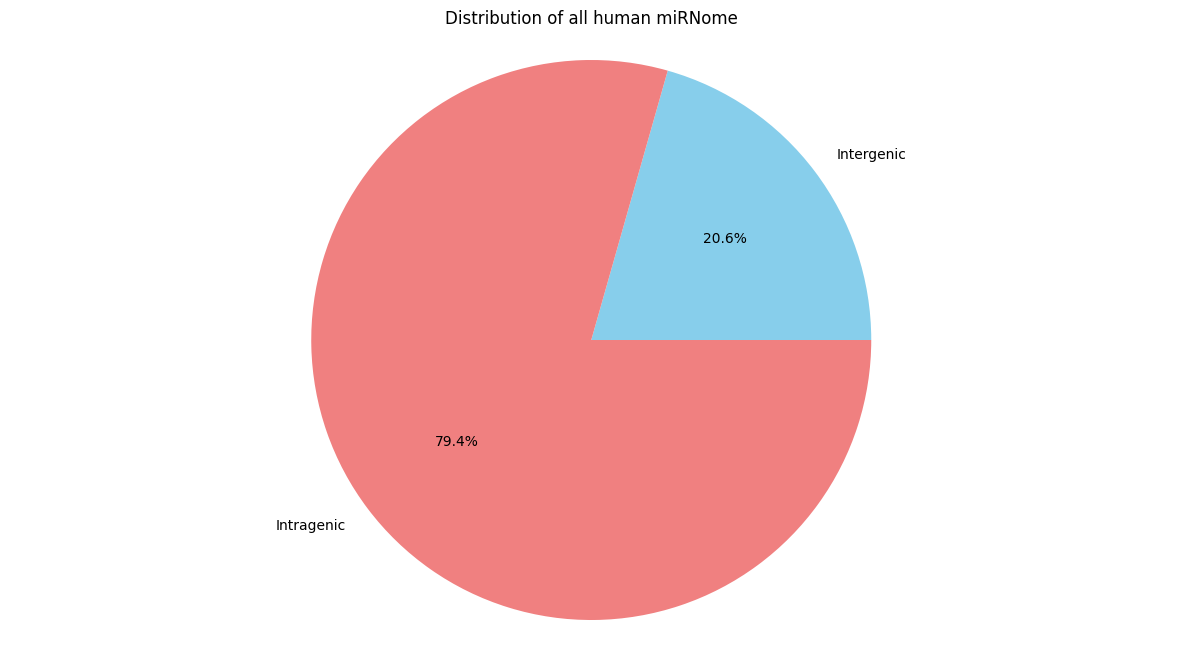

In [121]:
#Human miR loci distribution pie Chart
labels = ['Intergenic', 'Intragenic']
sizes = [hg_intergenic['Count'],hg_intragenic['Count']]
colors = ['skyblue','lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of all human miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Distribution of human miRNome(intergenic vs intragenic).eps')
plt.show()

### Intragenic Exonic sense vs antinsense

In [122]:
exonic_intragenic_columns=['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_exonCounts','hostgene_txStarts','hostgene_txEnds','mature_host_mRNA_Length',
       'hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name',
       'miR_strand', 'miR_ID']

In [123]:
Human_exonicmiR_intragenic=pd.read_csv(f"{current_dir}/Human_tsv_file/human_exonic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [124]:
Human_exonicmiR_antisense=pd.read_csv(f"{current_dir}/Human_tsv_file/human_exonic_miR_opposite_NCBI.tsv", sep="\t",
                                      header=None,names=exonic_intragenic_columns)

In [125]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic.loc[Human_exonicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [126]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [127]:
Human_exonicmiR_intragenic["miR_Name"]=Human_exonicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [128]:
Human_exonicmiR_intragenic["host_gene_region"]="exons"

In [129]:
Human_exonicmiR_intragenic

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,19460,COP1,XM_047427799.1,chr1,175968370,175968479,miRNA_primary_transcript,hsa-mir-1843,-,Alias=MI0032314,exons
32,chr1,9148010,9151835,9182338,9182338,-,2,9148010,9182338,4157,MIR34AHG,NR_132742.1,chr1,9151668,9151777,miRNA_primary_transcript,hsa-mir-34a,-,Alias=MI0000268,exons
35,chr1,12166990,12167169,12167091,12207020,+,10,12166990,12209220,3687,TNFRSF1B,NM_001066.3,chr1,12166943,12167038,miRNA_primary_transcript,hsa-mir-7846,+,Alias=MI0025516,exons
43,chr1,33332274,33332404,33324864,33375539,-,16,33323625,33431095,4050,PHC2,NM_001385119.1,chr1,33332393,33332492,miRNA_primary_transcript,hsa-mir-3605,-,Alias=MI0015995,exons
50,chr1,98046007,98046396,98049693,98049693,-,5,97987999,98049693,2469,MIR137HG,NR_046105.1,chr1,98046070,98046171,miRNA_primary_transcript,hsa-mir-137,-,Alias=MI0000454,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,chr22,41922031,41925554,41925366,41926773,-,3,41922031,41926806,3923,TNFRSF13C,NM_052945.4,chr22,41923222,41923297,miRNA_primary_transcript,hsa-mir-378i,-,Alias=MI0016902,exons
1998,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46112749,46112822,miRNA_primary_transcript,hsa-let-7a-3,+,Alias=MI0000062,exons
2001,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46113566,46113657,miRNA_primary_transcript,hsa-mir-4763,+,Alias=MI0017404,exons
2004,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,16367,LOC124905135,XM_047441696.1,chr22,46113686,46113768,miRNA_primary_transcript,hsa-let-7b,+,Alias=MI0000063,exons


In [130]:
Human_exonicmiR_antisense=Human_exonicmiR_antisense.loc[Human_exonicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [131]:
Human_exonicmiR_antisense=Human_exonicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [132]:
Human_exonicmiR_antisense["miR_Name"]=Human_exonicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [133]:
Human_exonicmiR_antisense["host_gene_region"]="exons"

In [134]:
Human_exonicmiR_antisense.shape

(70, 20)

In [135]:
Human_exonicmiR_antisense

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,host_gene_region
0,chr1,22863036,22863192,22710982,22913570,+,16,22710837,22921500,10943,EPHB2,XM_047449104.1,chr1,22863159,22863226,miRNA_primary_transcript,hsa-mir-4253,-,Alias=MI0015860,exons
14,chr1,43448102,43448644,43448644,43448644,-,2,43447775,43448644,699,SZT2-AS1,NR_046744.1,chr1,43448539,43448611,miRNA_primary_transcript,hsa-mir-6735,+,Alias=MI0022580,exons
17,chr1,116550384,116561187,116561187,116561187,+,3,116544700,116561187,11010,LOC105378925,XR_947739.2,chr1,116560024,116560111,miRNA_primary_transcript,hsa-mir-548ac,-,Alias=MI0016762,exons
19,chr1,172136878,172144835,172144835,172144835,-,1,172136878,172144835,7957,DNM3OS,NR_038397.2,chr1,172138808,172138888,miRNA_primary_transcript,hsa-mir-3120,+,Alias=MI0014136,exons
25,chr2,6650105,6650519,6650519,6650519,-,2,6649106,6650519,689,MIR7515HG,NR_110497.1,chr2,6650373,6650439,miRNA_primary_transcript,hsa-mir-7515,+,Alias=MI0024354,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,chr19,51692633,51693456,51693456,51693456,-,2,51685362,51693456,3962,SPACA6-AS1,NR_108100.1,chr19,51693254,51693339,miRNA_primary_transcript,hsa-mir-125a,+,Alias=MI0000469,exons
549,chr19,53787021,53787759,53788225,53788225,-,2,53787021,53788225,1077,LOC124904767,XR_007067336.1,chr19,53787675,53787741,miRNA_primary_transcript,hsa-mir-371a,+,Alias=MI0000779,exons
552,chr19,53787886,53788225,53788225,53788225,-,2,53787021,53788225,1077,LOC124904767,XR_007067336.1,chr19,53787890,53787956,miRNA_primary_transcript,hsa-mir-372,+,Alias=MI0000780,exons
555,chr20,62064450,62065458,61976167,62064694,-,16,61974797,62065863,4392,TAF4,XM_047440429.1,chr20,62064802,62064885,miRNA_primary_transcript,hsa-mir-3195,+,Alias=MI0014240,exons


In [136]:
Human_exonicmiR_intragenic=pd.concat([Human_exonicmiR_intragenic,Human_exonicmiR_antisense],axis=0)

In [137]:
Human_exonicmiR_intragenic.shape

(367, 20)

### Intronic_antisense

In [138]:
intronic_intragenic_columns=['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds', 'hostgene_cdsStart', 'hostgene_cdsEnd'
         , 'hostgene_strand','hostgene_Name', 'hostgene_NCBI_ID','miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type'
         , 'miR_Name','miR_strand', 'miR_ID']

In [139]:
len(intronic_intragenic_columns)

15

In [140]:
Human_intronicmiR_intragenic=pd.read_csv(f"{current_dir}/Human_tsv_file/human_intronic_miR_intragenic_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [141]:
Human_intronicmiR_antisense=pd.read_csv(f"{current_dir}/Human_tsv_file/human_intronic_opposite_miR_NCBI.tsv", sep="\t",
                                      header=None,names=intronic_intragenic_columns)

In [142]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic.loc[Human_intronicmiR_intragenic['miR_type']=="miRNA_primary_transcript"]

In [143]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic.drop_duplicates(subset=["miR_Name"])

In [144]:
Human_intronicmiR_intragenic.shape

(1157, 15)

In [145]:
Human_intronicmiR_intragenic["miR_Name"]=Human_intronicmiR_intragenic["miR_Name"].str.replace("Name=", "")

In [146]:
Human_intronicmiR_intragenic["host_gene_region"]= "introns"

In [147]:
Human_intronicmiR_antisense=Human_intronicmiR_antisense.loc[Human_intronicmiR_antisense['miR_type']=="miRNA_primary_transcript"]

In [148]:
Human_intronicmiR_antisense=Human_intronicmiR_antisense.drop_duplicates(subset=["miR_Name"])

In [149]:
Human_intronicmiR_antisense["miR_Name"]=Human_intronicmiR_antisense["miR_Name"].str.replace("Name=", "")

In [150]:
Human_intronicmiR_antisense["host_gene_region"]="introns"

In [151]:
Human_intronicmiR_antisense.shape

(253, 16)

In [152]:
Human_intronicmiR_intragenic=pd.concat([Human_intronicmiR_intragenic, Human_intronicmiR_antisense],axis=0)

### Merge exonic and intronic intragenic files and determine the transcriptional direction of miRNAs relative to the hostgenes

In [153]:
Human_exonicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'mature_host_mRNA_Length', 'hostgene_Name', 'hostgene_NCBI_ID',
       'miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type', 'miR_Name',
       'miR_strand', 'miR_ID', 'host_gene_region'],
      dtype='object')

In [154]:
Human_exonicmiR_intragenic=Human_exonicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [155]:
Human_intronicmiR_intragenic.columns

Index(['hostgene_chrom', 'hostgene_txStarts', 'hostgene_txEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_Name', 'miR_strand', 'miR_ID',
       'host_gene_region'],
      dtype='object')

In [156]:
Human_intronicmiR_intragenic=Human_intronicmiR_intragenic[['hostgene_NCBI_ID', 'hostgene_Name','hostgene_strand',
      'miR_type', 'miR_Name', 'miR_ID','miR_strand','host_gene_region']]

In [157]:
Human_intragenic_df=pd.concat([Human_exonicmiR_intragenic,Human_intronicmiR_intragenic], axis=0)

In [158]:
Human_intragenic_df.shape

(1777, 8)

In [159]:
Human_intronicmiR_intragenic.shape

(1410, 8)

In [160]:
Human_exonicmiR_intragenic.shape

(367, 8)

In [161]:
Human_intragenic_df=Human_intragenic_df.drop_duplicates(subset=["miR_Name"])

In [162]:
Human_intragenic_df.shape

(1519, 8)

In [163]:
def transcription_direction(df,transcription_direction,hostgene_strand,miRNA_strand):
    df[transcription_direction] = df.apply(lambda row: "sense (+)" if row[hostgene_strand] == row[miRNA_strand] else "antisense (-)", axis=1)
    return df

In [164]:
transcription_direction(Human_intragenic_df,"transcription_direction_relative_to_the_host_gene","hostgene_strand","miR_strand")

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,miR_type,miR_Name,miR_ID,miR_strand,host_gene_region,transcription_direction_relative_to_the_host_gene
0,XM_047427799.1,COP1,-,miRNA_primary_transcript,hsa-mir-1843,Alias=MI0032314,-,exons,sense (+)
32,NR_132742.1,MIR34AHG,-,miRNA_primary_transcript,hsa-mir-34a,Alias=MI0000268,-,exons,sense (+)
35,NM_001066.3,TNFRSF1B,+,miRNA_primary_transcript,hsa-mir-7846,Alias=MI0025516,+,exons,sense (+)
43,NM_001385119.1,PHC2,-,miRNA_primary_transcript,hsa-mir-3605,Alias=MI0015995,-,exons,sense (+)
50,NR_046105.1,MIR137HG,-,miRNA_primary_transcript,hsa-mir-137,Alias=MI0000454,-,exons,sense (+)
...,...,...,...,...,...,...,...,...,...
24840,NM_001135729.2,TOM1,+,miRNA_primary_transcript,hsa-mir-6069,Alias=MI0020346,-,introns,antisense (-)
24886,XM_047441138.1,ANKRD54,-,miRNA_primary_transcript,hsa-mir-659,Alias=MI0003683,-,introns,sense (+)
24901,NM_001282726.2,SLC25A17,-,miRNA_primary_transcript,hsa-mir-4766,Alias=MI0017407,-,introns,sense (+)
24952,XM_011530347.3,SREBF2,+,miRNA_primary_transcript,hsa-mir-33a,Alias=MI0000091,+,introns,sense (+)


In [165]:
hg_intramiR_loci=Human_intragenic_df.groupby(Human_intragenic_df["transcription_direction_relative_to_the_host_gene"]).size().reset_index(name='Count')

In [166]:
hg_intramiR_loci

,transcription_direction_relative_to_the_host_gene,Count
0,antisense (-),284
1,sense (+),1235


In [167]:
hg_intramiR_sense=hg_intramiR_loci[hg_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='sense (+)'].sum()
hg_intramiR_antisense=hg_intramiR_loci[hg_intramiR_loci["transcription_direction_relative_to_the_host_gene"]=='antisense (-)'].sum()

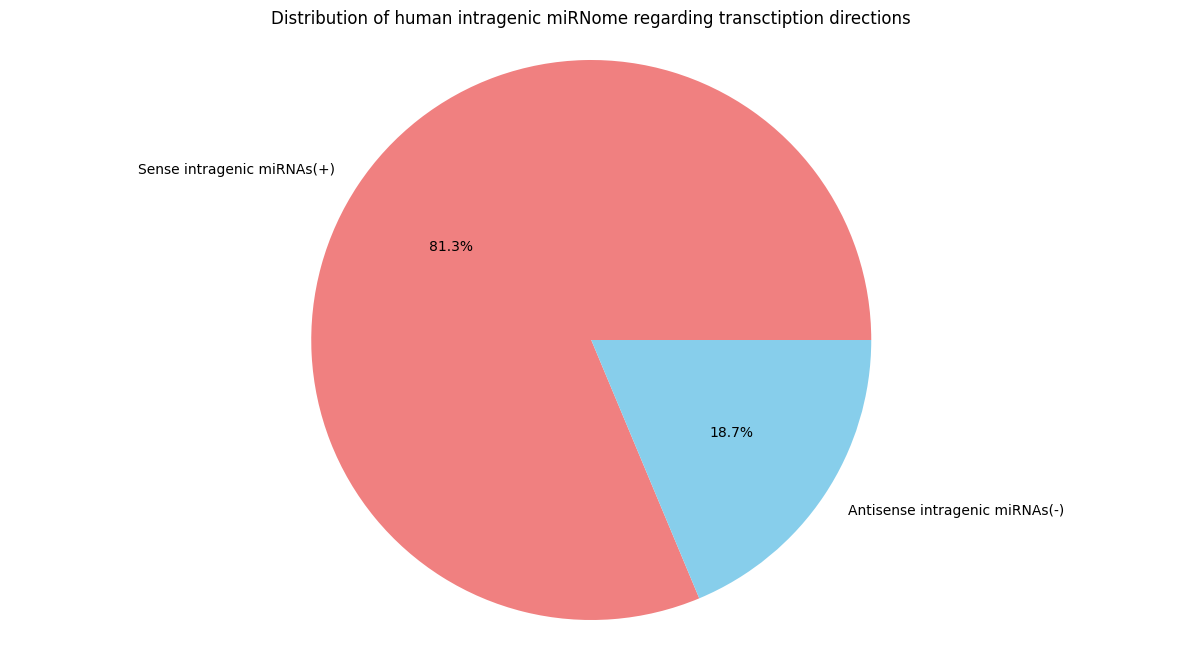

In [168]:
#Human miR loci distribution pie Chart
labels = ['Sense intragenic miRNAs(+)', 'Antisense intragenic miRNAs(-)']


sizes = [hg_intramiR_sense['Count'], hg_intramiR_antisense['Count']]
colors = ['lightcoral','skyblue']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human intragenic miRNome regarding transctiption directions')
plt.savefig(f'{current_dir}/Human_eps_file/Distribution of human intragenic miRNome.eps')
plt.show()

### Human

In [169]:
Sub_hg_loci=Human_miR_type_finalized_df.groupby(Human_miR_type_finalized_df['miRNA_type']).size().reset_index(name='Count')

In [170]:
Sub_hg_loci

,miRNA_type,Count
0,exonic miR,201
1,intronic miR,969
2,no host mRNA miR,394
3,partially overlapped with exons or opposite tr...,349


In [171]:
hg_exonic=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='exonic miR'].sum()
hg_intronic=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='intronic miR'].sum()
# hg_no_hostmRNA=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='no host mRNA miR'].sum()
# hg_partexons=Sub_hg_loci[Sub_hg_loci['miRNA_type']=='partially overlapped with exons or opposite transcriptional units'].sum()

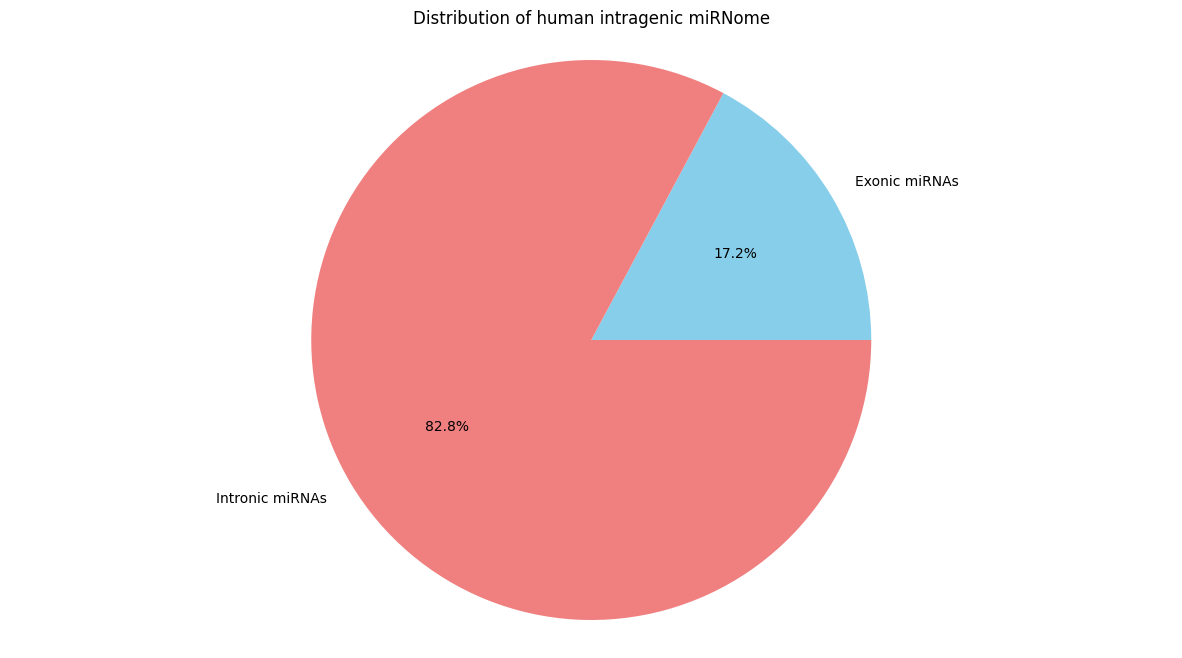

In [172]:
#Human miR loci distribution pie Chart
labels = ['Exonic miRNAs', 'Intronic miRNAs']
#'Intergenetic miRNAs','partially overlapped with exons or opposite transcriptional units' are removed

sizes = [hg_exonic['Count'], hg_intronic['Count']]#hg_no_hostmRNA['Count'],hg_partexons['Count'] are removed
colors = ['skyblue', 'lightcoral']#['lightgreen','orange'] is removed
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human intragenic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Distribution of human miRNome.eps')
plt.show()

In [173]:
Human_miR_type_finalized_df

,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_Name,miR_strand,miR_ID,miRNA_type,main_miRNA_type
0,chr1,17369,17436,miRNA_primary_transcript,hsa-mir-6859-1,-,Alias=MI0022705,intronic miR,intragenic
3,chr1,30366,30503,miRNA_primary_transcript,hsa-mir-1302-2,+,Alias=MI0006363,exonic miR,intragenic
5,chr1,187891,187958,miRNA_primary_transcript,hsa-mir-6859-2,-,Alias=MI0026420,intronic miR,intragenic
8,chr1,632615,632685,miRNA_primary_transcript,hsa-mir-12136,-,Alias=MI0039740,no host mRNA miR,intergenic
10,chr1,1167104,1167198,miRNA_primary_transcript,hsa-mir-200b,+,Alias=MI0000342,exonic miR,intragenic
...,...,...,...,...,...,...,...,...,...
4795,chrX,155457517,155457615,miRNA_primary_transcript,hsa-mir-1184-3,+,Alias=MI0015972,partially overlapped with exons or opposite tr...,intragenic
4797,chrY,1293918,1293992,miRNA_primary_transcript,hsa-mir-3690-2,+,Alias=MI0023561,partially overlapped with exons or opposite tr...,intragenic
4799,chrY,2609191,2609254,miRNA_primary_transcript,hsa-mir-6089-2,+,Alias=MI0023563,partially overlapped with exons or opposite tr...,intragenic
4801,chrY,4606120,4606228,miRNA_primary_transcript,hsa-mir-9985,+,Alias=MI0032313,no host mRNA miR,intergenic


In [174]:
# Save the files (unique lists)
Human_miR_type_finalized_df.to_csv(f'{csv_file_path}/Human_miR_type_finalized_df_unique.csv',index=False)
Human_miR_type_finalized_df.to_excel(f'{excel_file_path}/Human_miR_type_finalized_df_unique.xlsx',index=False)

### Map the locations of exonic microRNAs using OOP(e.g. 3'UTR,5'UTR, CDS,etc.)

### Human

In [175]:
import import_ipynb
from EXONIC import Regions

importing Jupyter notebook from EXONIC.ipynb


In [176]:
all_exonic_human_exonic_miR=Regions(f'{csv_file_path}/human_exonic_miR(gene_type)_NCBI.csv')

In [177]:
all_exonic_human_exonic_miR.df.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'mature_host_mRNA_Length', 'hostgene_Name', 'hostgene_NCBI_ID',
       'miR_name', 'miR_chrom', 'miR_exonStarts', 'miR_exonEnds', 'miR_type',
       'miR_strand', 'gene_type', 'pre_mRNA_length'],
      dtype='object')

In [178]:
all_exonic_human_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','miR_name', 
                                   'miR_strand','gene_type'])

In [179]:
all_exonic_human_exonic_miR.df.to_csv(f'{csv_file_path}/human_exonic_miR_list(all_host_genes)_NCBI_no_loc.csv',index=False)
all_exonic_human_exonic_miR.df.to_excel(f'{excel_file_path}/human_exonic_miR_list(all_host_genes)_NCBI_no_loc.xlsx',index=False)
#### without the genomic coordinates

In [180]:
finalized_human_exonic_miR=Regions(f'{csv_file_path}/human_exonic_miR(gene_type)_NCBI.csv')

In [181]:
finalized_human_exonic_miR.select_coding()#### select protein-coding genes

In [182]:
finalized_human_exonic_miR.add_region()
### add a new column called region, which will contain information of location of microRNAs such as 5'UTR,3'UTR,CDS

In [183]:
finalized_human_exonic_miR.select(['hostgene_NCBI_ID','hostgene_Name','hostgene_strand','hostgene_exonCounts','miR_name', 
                                   'miR_strand','region',"pre_mRNA_length",'mature_host_mRNA_Length','gene_type'])

In [184]:
finalized_human_exonic_miR.df.head()

,hostgene_NCBI_ID,hostgene_Name,hostgene_strand,hostgene_exonCounts,miR_name,miR_strand,region,pre_mRNA_length,mature_host_mRNA_Length,gene_type
0,XM_047427799.1,COP1,-,13,hsa-mir-1843,-,3'UTR,209014.0,19460,protein-coding gene
1,XM_017002080.3,COP1,-,13,hsa-mir-1843,-,3'UTR,222022.0,19427,protein-coding gene
2,XM_017002071.2,COP1,-,17,hsa-mir-1843,-,3'UTR,230735.0,19706,protein-coding gene
3,XM_017002073.2,COP1,-,16,hsa-mir-1843,-,3'UTR,230735.0,19646,protein-coding gene
4,XM_017002059.3,COP1,-,20,hsa-mir-1843,-,3'UTR,253329.0,20618,protein-coding gene


In [185]:
finalized_human_exonic_miR.df.shape

(356, 10)

In [186]:
finalized_human_exonic_miR.df.to_excel(f'{excel_file_path}/human_exonic_miR_list(protein_coding_host_genes)_NCBI.xlsx',index=False)
finalized_human_exonic_miR.df.to_csv(f'{csv_file_path}/human_exonic_miR_list(protein_coding_host_genes)_NCBI.csv',index=False)

In [187]:
finalized_human_exonic_miR_new=finalized_human_exonic_miR.df.drop_duplicates(subset=['miR_name'])

In [188]:
##### save unique list is shown below:
finalized_human_exonic_miR_new.to_csv(f'{csv_file_path}/human_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv',index=False)
finalized_human_exonic_miR_new.to_excel(f'{excel_file_path}/human_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.xlsx',index=False)

### Plotting

### Human

In [189]:
def move_column(df, column, new_position):
    """This function will reassign the column to a new position."""
    col = df.pop(column)
    df.insert(new_position, column, col)
    return df

In [190]:
move_column(human_exonicmiR_df,'pre_mRNA_length',9)

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,mature_host_mRNA_Length,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,209014.0,19460,COP1,XM_047427799.1,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
1,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176175979,222022.0,19427,COP1,XM_017002080.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
2,chr1,175953957,175972080,175971939,176175951,-,17,175953957,176184692,230735.0,19706,COP1,XM_017002071.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
3,chr1,175953957,175972080,175971939,176175951,-,16,175953957,176184692,230735.0,19646,COP1,XM_017002073.2,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
4,chr1,175953957,175972080,175971939,176206978,-,20,175953957,176207286,253329.0,20618,COP1,XM_017002059.3,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,27932.0,16167,LOC124905135,XM_047441694.1,hsa-let-7a-3,chr22,46112749,46112822,miRNA_primary_transcript,+,protein-coding gene
510,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,27932.0,16167,LOC124905135,XM_047441694.1,hsa-mir-4763,chr22,46113566,46113657,miRNA_primary_transcript,+,protein-coding gene
511,chr22,46097925,46113928,46103479,46104589,+,2,46085996,46113928,27932.0,16167,LOC124905135,XM_047441694.1,hsa-let-7b,chr22,46113686,46113768,miRNA_primary_transcript,+,protein-coding gene
512,chr22,46086166,46095238,46097919,46097919,+,3,46086166,46097919,11753.0,11634,LOC112268288,XR_002958733.2,hsa-mir-3619,chr22,46091044,46091126,miRNA_primary_transcript,+,non-coding gene


In [191]:
### save it as a csv file for the unique list of miRNAs
human_exonicmiR_df_new=human_exonicmiR_df.drop_duplicates(subset=['miR_name'])
human_exonicmiR_df_new.to_csv(f'{csv_file_path}/human_exonic_miR(gene_type)_NCBI_unique.csv',index=False)
human_exonicmiR_df_new.to_excel(f'{excel_file_path}/human_exonic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [224]:
human_exonicmiR_df_new

,hostgene_chrom,hostgene_exonStarts,hostgene_exonEnds,hostgene_cdsStart,hostgene_cdsEnd,hostgene_strand,hostgene_exonCounts,hostgene_txStarts,hostgene_txEnds,pre_mRNA_length,...,hostgene_Name,hostgene_NCBI_ID,miR_name,miR_chrom,miR_exonStarts,miR_exonEnds,miR_type,miR_strand,gene_type,host_gene_region
0,chr1,175953957,175972080,175971939,176149067,-,13,175953957,176162971,209014.0,...,COP1,XM_047427799.1,hsa-mir-1843,chr1,175968370,175968479,miRNA_primary_transcript,-,protein-coding gene,exons
16,chr1,9148010,9151835,9182338,9182338,-,2,9148010,9182338,34328.0,...,MIR34AHG,NR_132742.1,hsa-mir-34a,chr1,9151668,9151777,miRNA_primary_transcript,-,non-coding gene,exons
17,chr1,98046007,98046396,98049693,98049693,-,5,97987999,98049693,61694.0,...,MIR137HG,NR_046105.1,hsa-mir-137,chr1,98046070,98046171,miRNA_primary_transcript,-,non-coding gene,exons
18,chr1,98040913,98045503,98044868,98045390,-,1,98040913,98045503,4590.0,...,LOC124904228,XM_047437906.1,hsa-mir-2682,chr1,98045242,98045351,miRNA_primary_transcript,-,protein-coding gene,exons
19,chr1,109592344,109600195,109548720,109592233,+,9,109548614,109600195,51581.0,...,GNAI3,NM_006496.4,hsa-mir-197,chr1,109598893,109598967,miRNA_primary_transcript,+,protein-coding gene,exons
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,chr22,41922031,41925554,41925366,41926773,-,3,41922031,41926806,4775.0,...,TNFRSF13C,NM_052945.4,hsa-mir-378i,chr22,41923222,41923297,miRNA_primary_transcript,-,protein-coding gene,exons
494,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-let-7a-3,chr22,46112749,46112822,miRNA_primary_transcript,+,protein-coding gene,exons
495,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-mir-4763,chr22,46113566,46113657,miRNA_primary_transcript,+,protein-coding gene,exons
496,chr22,46097925,46113928,46103479,46104589,+,2,46044643,46113928,69285.0,...,LOC124905135,XM_047441696.1,hsa-let-7b,chr22,46113686,46113768,miRNA_primary_transcript,+,protein-coding gene,exons


In [193]:
human_exonicmiR_coding_df=Regions(f'{csv_file_path}/human_exonic_miR_list(protein_coding_host_genes)_NCBI_unique.csv')

In [194]:
human_exonicmiR_coding_df.df.shape

(118, 10)

In [195]:
human_exonic_miR_region=human_exonicmiR_coding_df.df.groupby(human_exonicmiR_coding_df.df['region']).size().reset_index(name='Human')

In [196]:
human_exonic_miR_region

,region,Human
0,3'UTR,58
1,5'UTR,30
2,CDS,25
3,Span from CDS and 3'UTR,4
4,Span from CDS and 5'UTR,1


In [197]:
hg_exonic_3_UTR= human_exonic_miR_region[human_exonic_miR_region['region']=='3\'UTR'].sum()
hg_exonic_5_UTR= human_exonic_miR_region[human_exonic_miR_region['region']=='5\'UTR'].sum()
hg_exonic_CDS=human_exonic_miR_region[human_exonic_miR_region['region']=='CDS'].sum()
hg_exonic_3_CDS_UTR=human_exonic_miR_region[human_exonic_miR_region['region']=='Span from CDS and 3\'UTR'].sum()
hg_exonic_5_CDS_UTR=human_exonic_miR_region[human_exonic_miR_region['region']=='Span from CDS and 5\'UTR'].sum()

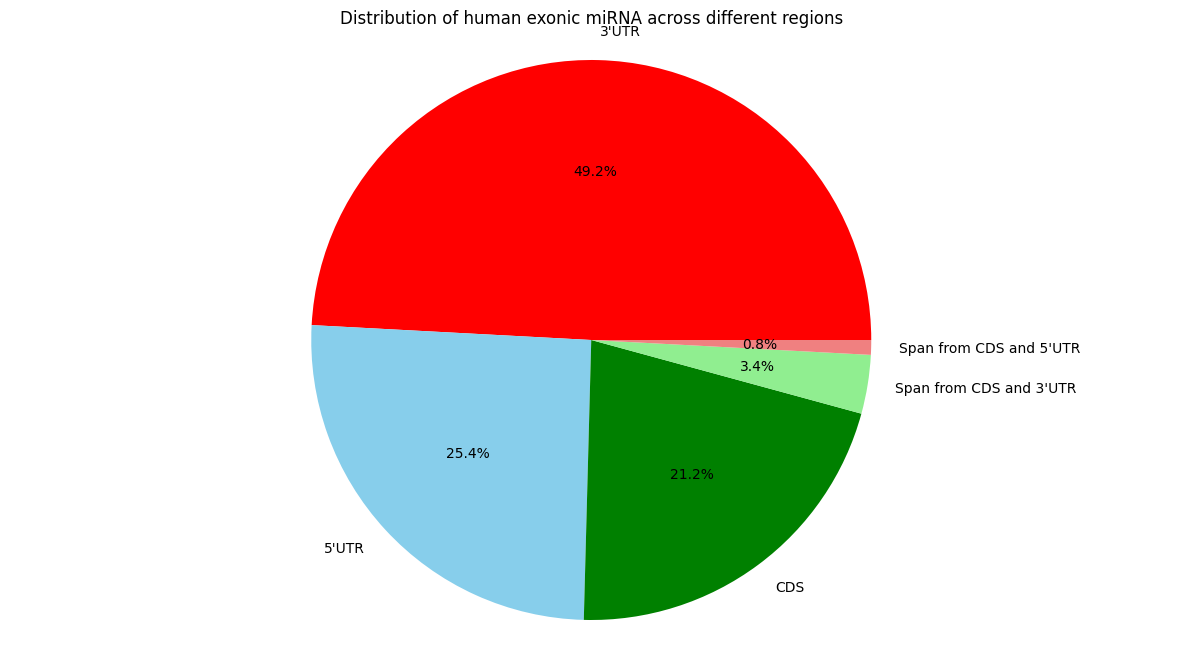

In [198]:
labels = ['3\'UTR', '5\'UTR', 'CDS','Span from CDS and 3\'UTR','Span from CDS and 5\'UTR']
sizes = [hg_exonic_3_UTR['Human'], hg_exonic_5_UTR['Human'],hg_exonic_CDS['Human'],hg_exonic_3_CDS_UTR['Human'],hg_exonic_5_CDS_UTR['Human']]
colors = ['red', 'skyblue', 'green','lightgreen', 'lightcoral']
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of human exonic miRNA across different regions')
plt.savefig(f'{current_dir}/Human_eps_file/Distribution of human exonic miRNA across different regions of the gene.eps')
plt.show()

### Coding intragenic genes(Intronic vs Exonic sense miRs)

### Exonic 

In [199]:
human_exonicmiR_df_new.columns

Index(['hostgene_chrom', 'hostgene_exonStarts', 'hostgene_exonEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_exonCounts', 'hostgene_txStarts', 'hostgene_txEnds',
       'pre_mRNA_length', 'mature_host_mRNA_Length', 'hostgene_Name',
       'hostgene_NCBI_ID', 'miR_name', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_strand', 'gene_type'],
      dtype='object')

In [200]:
human_exonicmiR_df_new.shape

(201, 20)

In [201]:
human_exonicmiR_df_new["host_gene_region"]="exons"

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/4035786551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_exonicmiR_df_new["host_gene_region"]="exons"


In [202]:
human_intramiR_exonic_gene_type=human_exonicmiR_df_new[[ 'hostgene_NCBI_ID', 'hostgene_Name',
       'miR_name', 'miR_type', 'miR_strand', 'gene_type','host_gene_region']]

### Intronic 

In [203]:
human_intronicmiR_df_gene_type=human_intronicmiR_df.drop_duplicates(subset=['miR_name'])

In [204]:
human_intronicmiR_df_gene_type.to_csv(f'{csv_file_path}/human_intronic_miR(gene_type)_NCBI_unique.csv',index=False)
human_intronicmiR_df_gene_type.to_excel(f'{excel_file_path}/human_intronic_miR(gene_type)_NCBI_unique.xlsx',index=False)

In [205]:
human_intronicmiR_df_gene_type.columns

Index(['hostgene_chrom', 'hostgene_TxStarts', 'hostgene_TxEnds',
       'hostgene_cdsStart', 'hostgene_cdsEnd', 'hostgene_strand',
       'hostgene_Name', 'hostgene_NCBI_ID', 'miR_chrom', 'miR_exonStarts',
       'miR_exonEnds', 'miR_type', 'miR_name', 'miR_strand', 'gene_type',
       'pre_mRNA_length'],
      dtype='object')

In [206]:
human_intronicmiR_df_gene_type.shape

(969, 16)

In [207]:
human_intronicmiR_df_gene_type["host_gene_region"]="introns"

/var/folders/hz/4x5ldhv54fscy_nw6y5dbf2m0000gn/T/ipykernel_11537/1561523699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  human_intronicmiR_df_gene_type["host_gene_region"]="introns"


In [208]:
human_intronicmiR_df_gene_type.shape

(969, 17)

In [209]:
human_intramiR_intronic_gene_type=human_intronicmiR_df_gene_type[[ 'hostgene_NCBI_ID', 'hostgene_Name',
       'miR_name', 'miR_type', 'miR_strand', 'gene_type','host_gene_region']]

In [210]:
human_intramiR_intronic_gene_type.shape

(969, 7)

In [211]:
human_intramiR_gene_type=pd.concat([human_intramiR_exonic_gene_type,human_intramiR_intronic_gene_type],axis=0)

In [212]:
human_intramiR_gene_type

,hostgene_NCBI_ID,hostgene_Name,miR_name,miR_type,miR_strand,gene_type,host_gene_region
0,XM_047427799.1,COP1,hsa-mir-1843,miRNA_primary_transcript,-,protein-coding gene,exons
16,NR_132742.1,MIR34AHG,hsa-mir-34a,miRNA_primary_transcript,-,non-coding gene,exons
17,NR_046105.1,MIR137HG,hsa-mir-137,miRNA_primary_transcript,-,non-coding gene,exons
18,XM_047437906.1,LOC124904228,hsa-mir-2682,miRNA_primary_transcript,-,protein-coding gene,exons
19,NM_006496.4,GNAI3,hsa-mir-197,miRNA_primary_transcript,+,protein-coding gene,exons
...,...,...,...,...,...,...,...
8094,NM_001135729.2,TOM1,hsa-mir-3909,miRNA_primary_transcript,+,protein-coding gene,introns
8106,XM_047441138.1,ANKRD54,hsa-mir-659,miRNA_primary_transcript,-,protein-coding gene,introns
8111,NM_001282726.2,SLC25A17,hsa-mir-4766,miRNA_primary_transcript,-,protein-coding gene,introns
8128,XM_011530347.3,SREBF2,hsa-mir-33a,miRNA_primary_transcript,+,protein-coding gene,introns


In [214]:
hg_intramiR_coding=human_intramiR_gene_type.loc[human_intramiR_gene_type['gene_type']=="protein-coding gene"]

In [215]:
hg_intramiR_coding=hg_intramiR_coding.groupby(hg_intramiR_coding['host_gene_region']).size().reset_index(name='Count')

In [216]:
hg_intramiR_coding

,host_gene_region,Count
0,exons,116
1,introns,775


In [217]:
hg_exonic_intramiR_coding= hg_intramiR_coding[hg_intramiR_coding['host_gene_region']=='exons'].sum()
hg_intronic_intramiR_coding= hg_intramiR_coding[hg_intramiR_coding['host_gene_region']=='introns'].sum()

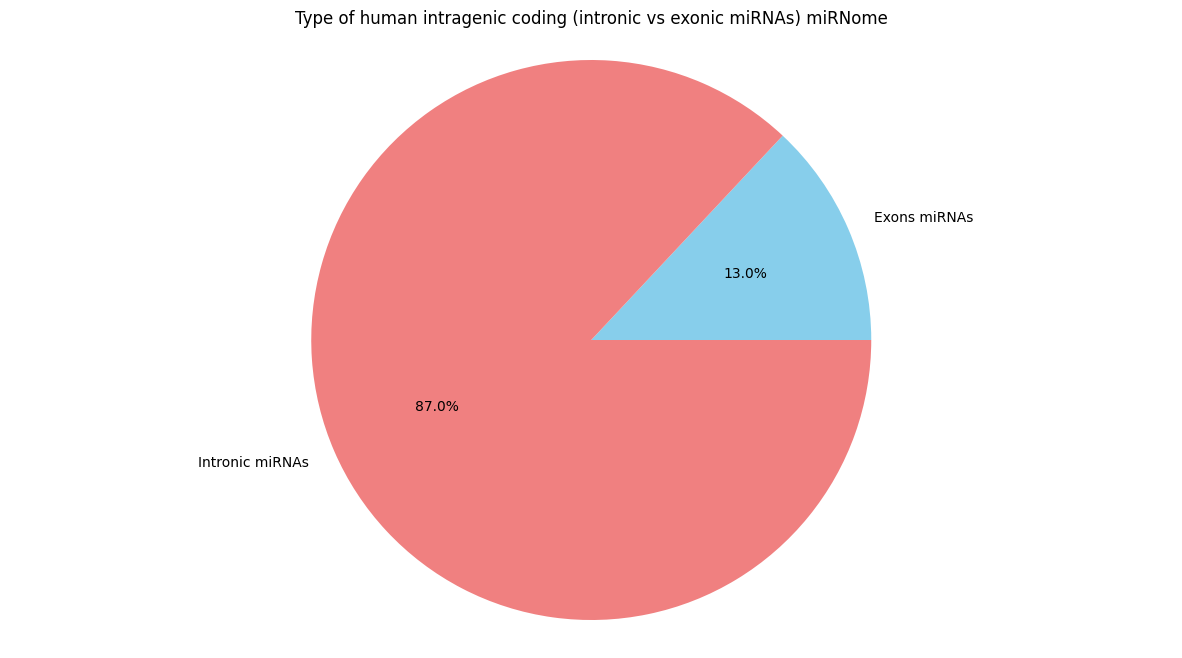

In [218]:
#Human miR loci distribution pie Chart
labels = ['Exons miRNAs', 'Intronic miRNAs']
sizes = [hg_exonic_intramiR_coding['Count'], hg_intronic_intramiR_coding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human intragenic coding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human intragenic coding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()


In [219]:
hg_intramiR_noncoding=human_intramiR_gene_type.loc[human_intramiR_gene_type['gene_type']=="non-coding gene"]

In [220]:
hg_intramiR_noncoding=hg_intramiR_noncoding.groupby(hg_intramiR_noncoding['host_gene_region']).size().reset_index(name='Count')

In [221]:
hg_intramiR_noncoding

,host_gene_region,Count
0,exons,85
1,introns,194


In [222]:
hg_exonic_intramiR_noncoding= hg_intramiR_noncoding[hg_intramiR_noncoding['host_gene_region']=='exons'].sum()
hg_intronic_intramiR_noncoding= hg_intramiR_noncoding[hg_intramiR_noncoding['host_gene_region']=='introns'].sum()

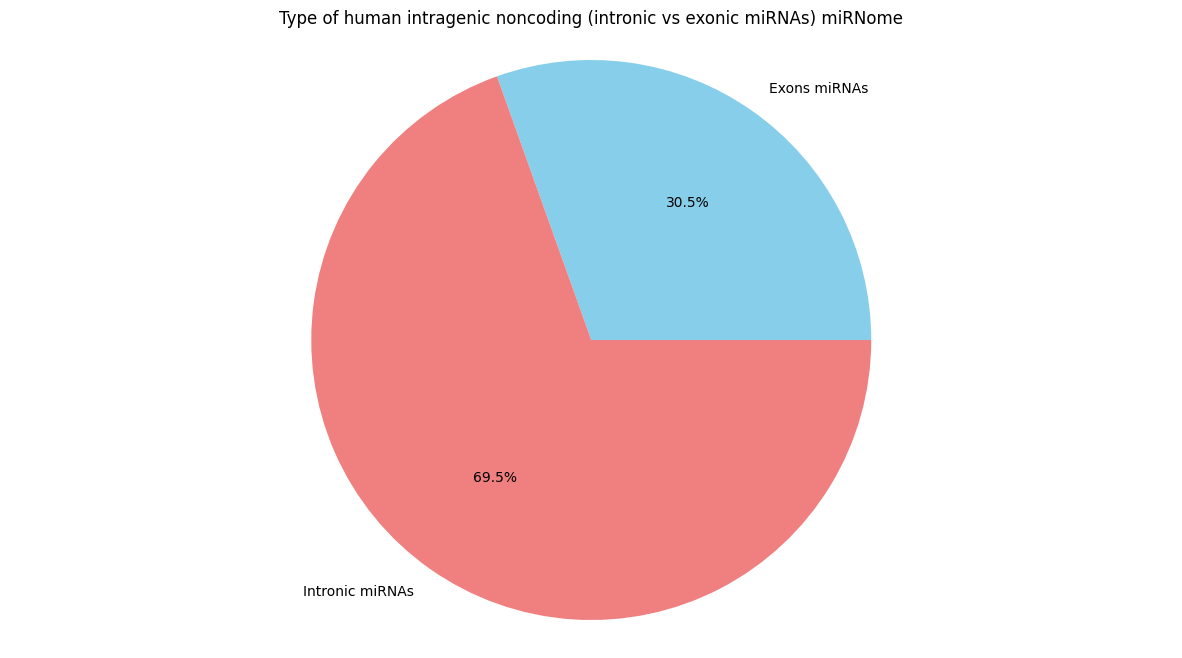

In [223]:
#Human miR loci distribution pie Chart
labels = ['Exons miRNAs', 'Intronic miRNAs']
sizes = [hg_exonic_intramiR_noncoding['Count'], hg_intronic_intramiR_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human intragenic noncoding (intronic vs exonic miRNAs) miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human intragenic noncoding (intronic vs exonic miRNAs) miRNome.eps')
plt.show()


## This is in thesis

### Noncoding vs Coding genes(Exonic_PLOT)

### Human

In [154]:
human_exonicmiR_df_gene_type=human_exonicmiR_df.drop_duplicates(subset=['miR_name'])

In [155]:
hg_miR_gene_type=human_exonicmiR_df_gene_type.groupby(human_exonicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [156]:
hg_miR_gene_type

,gene_type,Count
0,non-coding gene,85
1,protein-coding gene,116


In [157]:
hg_exonic_proteincoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='protein-coding gene'].sum()
hg_exonic_noncoding= hg_miR_gene_type[hg_miR_gene_type['gene_type']=='non-coding gene'].sum()

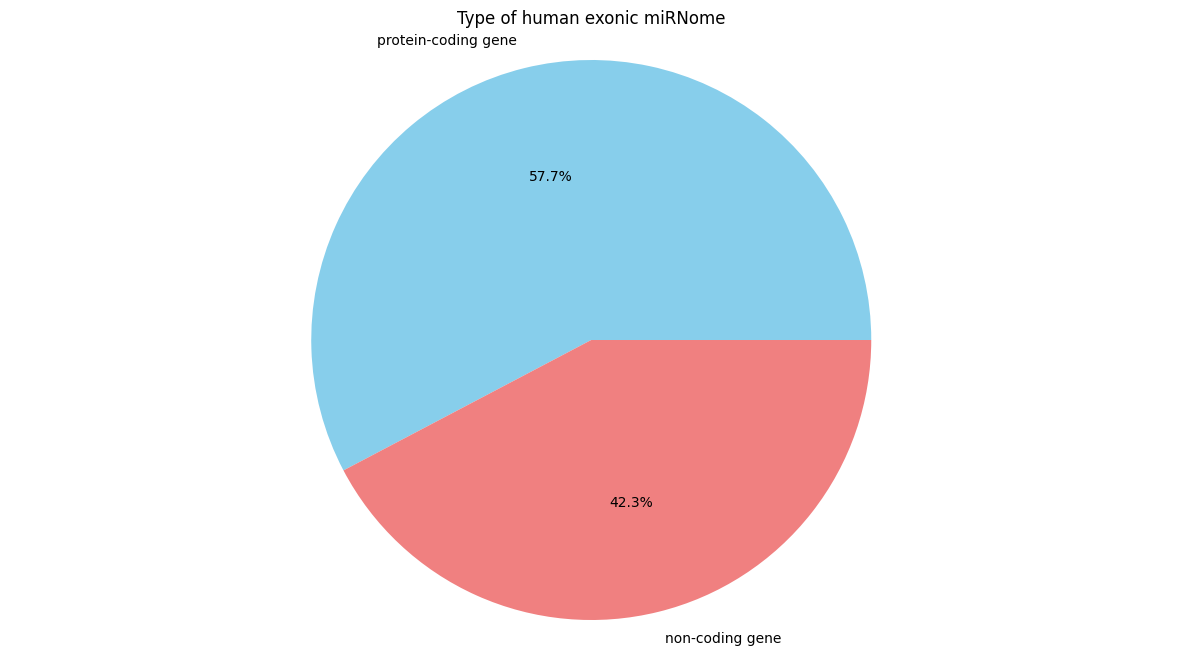

In [158]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_exonic_proteincoding['Count'], hg_exonic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human exonic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human exonic miRNome.eps')
plt.show()



### Noncodin vs Coding genes(Intronic_PLOT)

In [161]:
hg_miR_intronic_gene_type=human_intronicmiR_df.groupby(human_intronicmiR_df_gene_type['gene_type']).size().reset_index(name='Count')

In [162]:
hg_miR_intronic_gene_type

,gene_type,Count
0,non-coding gene,194
1,protein-coding gene,775


In [163]:
hg_intronic_proteincoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='protein-coding gene'].sum()
hg_intronic_noncoding= hg_miR_intronic_gene_type[hg_miR_intronic_gene_type['gene_type']=='non-coding gene'].sum()

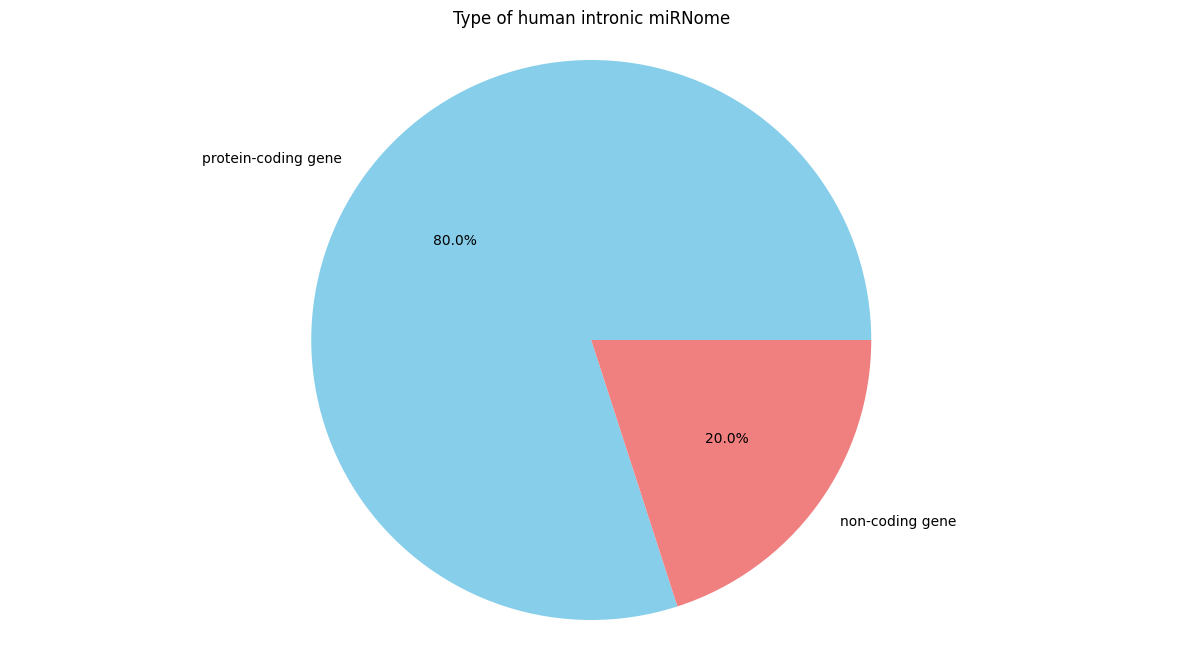

In [164]:
#Human miR loci distribution pie Chart
labels = ['protein-coding gene', 'non-coding gene']
sizes = [hg_intronic_proteincoding['Count'], hg_intronic_noncoding['Count']]
colors = ['skyblue','lightcoral', ]
plt.figure(figsize=(15, 8)) 
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Type of human intronic miRNome')
plt.savefig(f'{current_dir}/Human_eps_file/Type of human intronic miRNome.eps')
plt.show()


### Species merge

In [336]:
# speices_exonic_miR_region=speices_exonic_miR_region.merge(zfish_exonic_miR_region,on="region",how="left")

In [337]:
# speices_exonic_miR_region['Zebrafish']=speices_exonic_miR_region['Zebrafish'].fillna(0)

In [191]:
speices_exonic_miR_region=human_exonic_miR_region.merge(mouse_exonic_miR_region,on="region",how="left")

In [192]:
speices_exonic_miR_region

,region,Human,Mouse
0,3'UTR,57,32
1,5'UTR,29,26
2,CDS,25,19
3,Span from CDS and 3'UTR,4,2
4,Span from CDS and 5'UTR,1,1


In [193]:
speices_exonic_miR_region=speices_exonic_miR_region.set_index('region')

In [194]:
speices_exonic_miR_region=speices_exonic_miR_region.T

In [195]:
speices_exonic_miR_region

region,3'UTR,5'UTR,CDS,Span from CDS and 3'UTR,Span from CDS and 5'UTR
Human,57,29,25,4,1
Mouse,32,26,19,2,1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 500x800 with 0 Axes>

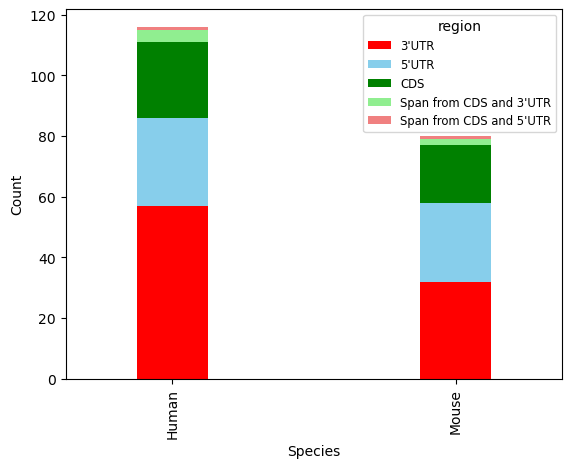

In [196]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(5,8))
speices_exonic_miR_region.plot(kind='bar', stacked=True, color=['red', 'skyblue', 'green','lightgreen', 'lightcoral', 'orange'],width=0.25)
# labels for x & y axis


plt.legend(title='region',loc="upper right", fontsize="small")
plt.xlabel('Species')
plt.ylabel('Count')
plt.savefig('Distribution of exonic miRNome.eps')
plt.show()